<a href="https://colab.research.google.com/github/dniggl/Insights/blob/main/Predict_Chance_of_Heart_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Predict chances that a person will have a heart attack using multiple models. 

In [ ]:
# Import software libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


The data set for this project can be found on Kaggle at this location:

https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [1]:
# Load the data into Colab.
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab

Saving heart.csv to heart.csv


In [ ]:
#Store the data into a data frame. 
heart_data = pd.read_csv('heart.csv')

In [ ]:
# Data analysis and exploration. 
# Print the first 5 rows
heart_data.head(5)  

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Show the number of rows and columns in the data frame.
heart_data.shape

(303, 14)

Data was provided by V.A. Medical Center, Long Beach and Cleveland Clinic Foundation. There are 303 observations with 13 features and 1 target variable. Definitions of the data variables are shown below:

*   Age : Age of the patient
*   Sex : Sex of the patient (0 = female, 1 = male) 
*   exang: exercise induced angina (1 = yes; 0 = no) 
*   ca: number of major vessels (0-3)
*   cp : Chest Pain type: 
        Value 1: typical angina
        Value 2: atypical angina
        Value 3: non-anginal pain
        Value 4: asymptomatic
*   trtbps : resting blood pressure (in mm Hg)
*   chol : cholestoral in mg/dl fetched via BMI sensor
*   fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
*   rest_ecg : resting electrocardiographic results:
        Value 0: normallity
        Value 1: having ST- T wave abnormal
        Value 2: showing probable or definite left ventricular hypertrophy
*   thalach : maximum heart rate achieved
*   output : 0= less chance of heart attack, 1= more chance of heart attack

In [ ]:
# View statistical details. 
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Mean age is 54, minimum age is 29 and maximum age is 77. 25% of the people are  less than 47 years old and 75% of the people are less than 61 years old.

In [ ]:
# Show information about the dataframe.
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Show counts for the number of people with less chance of heart attack (0) and more of a chance of heart attack (1).
heart_data['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

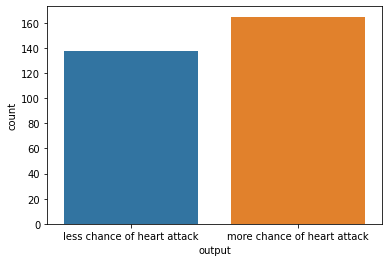

In [ ]:
# Visualize these counts.
sns.countplot(heart_data['output'])
plt.xticks(ticks=[0, 1], labels = ["less chance of heart attack", "more chance of heart attack"])
plt.show()

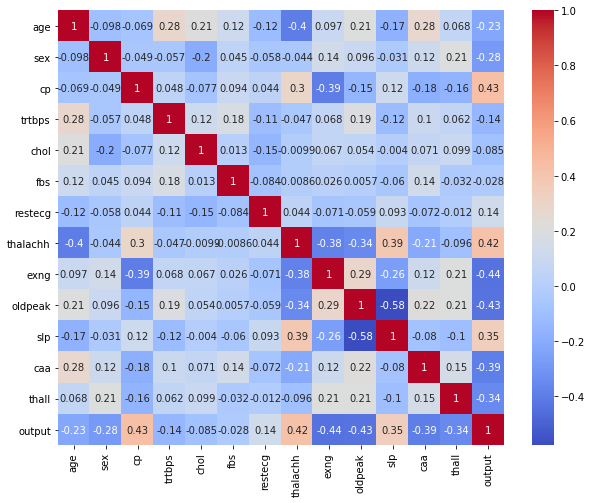

In [ ]:
# Show the correlation between variables with a heatmap.
plt.figure(figsize=(10,8))
sns.heatmap(heart_data.corr(), annot = True, cmap='coolwarm')

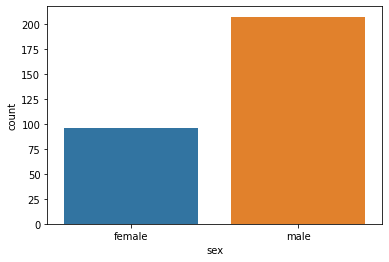

In [ ]:
# Show gender counts.
sns.countplot(x='sex', data=heart_data)
plt.xticks(ticks=[0, 1], labels = ["female", "male"])
plt.show()

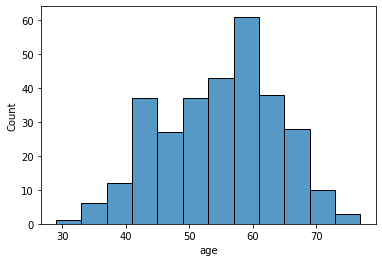

In [ ]:
# Show age distribution.
sns.histplot(x = "age", data=heart_data)

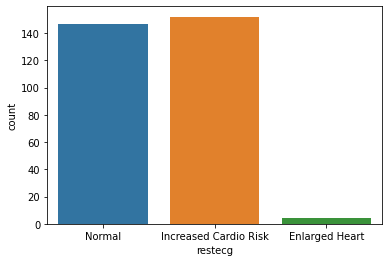

In [ ]:
# Show resting cardiogram counts.
sns.countplot(x = 'restecg', data = heart_data)
plt.xticks(ticks=[0, 1, 2], labels = ["Normal", "Increased Cardio Risk", "Enlarged Heart"])
plt.show()

Text(0.5, 0, 'Cholestoral amount when less chance of heart disease')

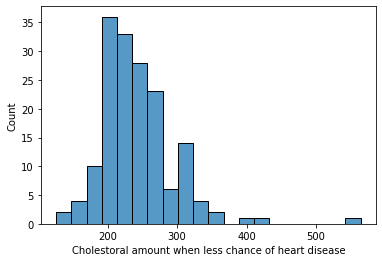

In [ ]:
# Show cholestoral amount when there is less chance of heart disease. 
hd1=heart_data[heart_data["output"] == 1]
sns.histplot(hd1["chol"],bins=20);
plt.xlabel("Cholestoral amount when less chance of heart disease")

Text(0.5, 0, 'Cholestoral amount when more chance of heart disease')

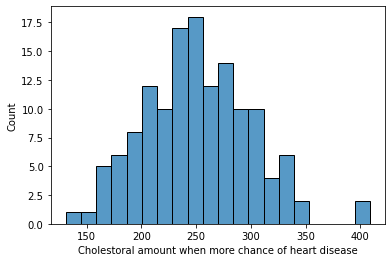

In [ ]:
# Show cholestoral amount when there is more chance of heart disease. 
hd1=heart_data[heart_data["output"] == 0]
sns.histplot(hd1["chol"],bins=20);
plt.xlabel("Cholestoral amount when more chance of heart disease")

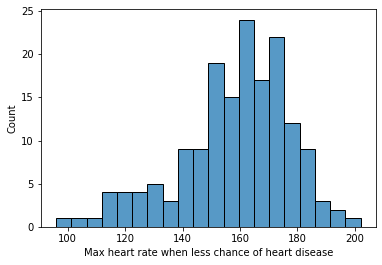

In [ ]:
# Show maximum heart rate when there is less chance of heart disease. 
hd1=heart_data[heart_data["output"] == 1]
sns.histplot(hd1["thalachh"],bins=20);
plt.xlabel("Max heart rate when less chance of heart disease")
plt.show()

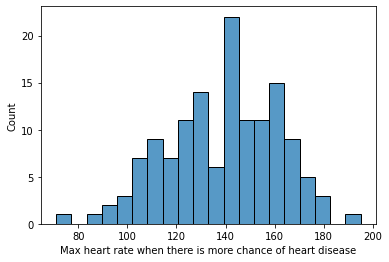

In [ ]:
# Show maximum heart rate when there is more chance of heart disease.
hd2=heart_data[heart_data["output"] == 0]
sns.histplot(hd2["thalachh"],bins=20);
plt.xlabel("Max heart rate when there is more chance of heart disease")
plt.show()

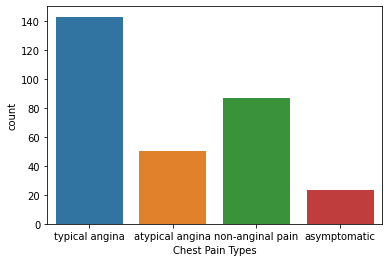

In [ ]:
# Show the distributions for chest pain types.
sns.countplot(x='cp', data=heart_data)
plt.xticks(ticks=[0, 1, 2, 3], labels = ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"])
plt.xlabel("Chest Pain Types")
plt.show()

In [ ]:
# Data cleaning. 
# Min-Max normalization.
# Normalize data in 5 columns because the values are too high in relation to the other variables. 
cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
for col in cols:
    minimum = min(heart_data[col])
    maximum = max(heart_data[col])
    heart_data[col] = (heart_data[col] - minimum) / (maximum - minimum)

In [ ]:
# Data values now range from 0 to 1 after min-max normalization. 
heart_data.head() 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2,1


In [ ]:
# Split the data into training and test data sets.
# First we need to divide our data into x values (the data we will use to make predictions) 
# and y values (the data we are attempting to predict).
x_data = heart_data.drop('output', axis = 1)
y_data = heart_data['output']

In [ ]:
# Import the train_test_split function from scikit-learn.
from sklearn.model_selection import train_test_split

In [ ]:
# Use train_test_split function to generate training data and test data.Test data set is 30% of original data set. 
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3, random_state=42)

In [ ]:
# Logistic Regression Model

In [ ]:
# Create an instance of the classifier and assign it to a model variable. 
model_lg = LogisticRegression(max_iter=120,random_state=42)

In [ ]:
# Train the model using the fit method and training data. 
model_lg.fit(x_training_data, y_training_data)

In [ ]:
# Make predictions on the test data. 
predictions_lr = model_lg.predict(x_test_data)

In [ ]:
# Calculate thee Accuracy Score.
lg = accuracy_score(y_test_data, predictions_lr)
print(lg)

0.8021978021978022


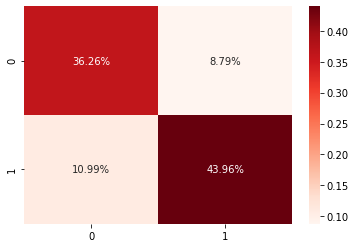

In [ ]:
# Show Confusion Maxtrix.
cm1 = confusion_matrix(y_test_data, predictions_lr)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

The logistic regression model correctly predicted 80.22% of the cases as having more or less of a chance for having heart disease. 
*   36.26% correctly predicted less chance of heart disease.
*   43.96% correctly predicted more chance of heart disease. 

19.78% of the cases were incorrectly classified as having more or less of a chance of having heart disease.
*   8.79% incorrectly predicted more chance of heart disease.
*   10.99% incorrectly predicted less chance of heart disease.

In [ ]:
# Decision Tree Classifier

In [ ]:
# Create an instance of the classifier and assign it to a model variable. 
model_dt = DecisionTreeClassifier(criterion = 'entropy', random_state=42)

In [ ]:
# Train the Model using the fit method and training data. 
model_dt.fit(x_training_data, y_training_data)

In [ ]:
# Make predictions on the test data. 
predictions_dt = model_dt.predict(x_test_data)

In [ ]:
# Calculate the Accuracy Score.
dt = accuracy_score(y_test_data, predictions_dt)
print(dt)

0.6923076923076923


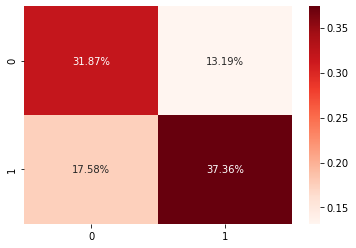

In [ ]:
# Show Confusion Maxtrix
cm2 = confusion_matrix(y_test_data, predictions_dt)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

The decision tree model correctly predicted 69.23% of the cases as having more or less of a chance for having heart disease.

*   31.87% correctly predicted less chance of heart disease.
*   37.36% correctly predicted more chance of heart disease.

19.78% of the cases were incorrectly classified as having more or less of a chance of having heart disease.

*   13.19% incorrectly predicted more chance of heart disease.
*   17.58% incorrectly predicted less chance of heart disease.


In [ ]:
# Random Forest

In [ ]:
# Create an instance of the classifier and assign it to a model variable. 
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)

In [ ]:
# Train the model using the fit method and training data.
model_rf.fit(x_training_data, y_training_data)

In [ ]:
# Make predictions on the test data. 
predictions_rf = model_rf.predict(x_test_data)

In [ ]:
# Calculate the Accuracy Score.
rf = accuracy_score(y_test_data, predictions_rf)
print(rf)

0.8901098901098901


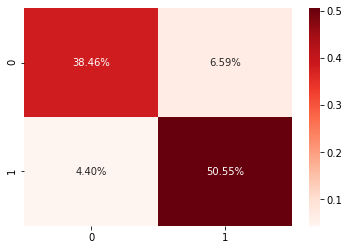

In [ ]:
# Show Confusion Maxtrix
cm3 = confusion_matrix(y_test_data, predictions_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')

The random forrest model correctly predicted 89.01% of the cases as having more or less of a chance for having heart disease.

*   38.46% correctly predicted less chance of heart disease.
*   50.55% correctly predicted more chance of heart disease.

10.99% of the cases were incorrectly classified as having more or less of a chance of having heart disease.

*   6.59% incorrectly predicted more chance of heart disease.
*   4.40% incorrectly predicted less chance of heart disease.


In [ ]:
# K Nearest Neighbours

In [ ]:
# Create an instance of the classifier and assign it to a model variable. 
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)

In [ ]:
# Train the model using the fit method and training data.
model_kn.fit(x_training_data, y_training_data)

In [ ]:
# Make predictions on the test data. 
predictions_kn = model_kn.predict(x_test_data)

In [ ]:
# Calculate the Accuracy Score.
kn = accuracy_score(y_test_data, predictions_kn)
print(kn)

0.8351648351648352


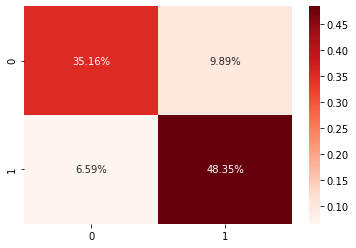

In [ ]:
# Show Confusion Maxtrix
cm4 = confusion_matrix(y_test_data, predictions_kn)
sns.heatmap(cm4/np.sum(cm4), annot = True, fmt=  '0.2%', cmap = 'Reds')

The K Nearest Neighbours model correctly predicted 83.51% of the cases as having more or less of a chance for having heart disease.

*   35.16% correctly predicted less chance of heart disease.
*   48.35% correctly predicted more chance of heart disease.

16.48% of the cases were incorrectly classified as having more or less of a chance of having heart disease.

*   9.89% incorrectly predicted more chance of heart disease.
*   6.59% incorrectly predicted less chance of heart disease.

,Model,Accuracy_score
2,Random Forest,0.890110
3,KNeighbours,0.835165
0,Logistic Regression,0.802198
1,Decision Tree,0.692308


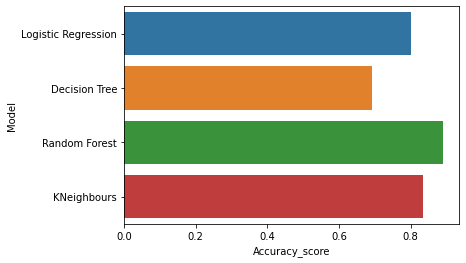

In [ ]:
# Show Accuraccy Score by Model.
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNeighbours'],
    'Accuracy_score' :[lg, dt, rf, kn]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

Conclusions: Random Forest and K Nearest Neighbours achieved the highest accuracy scores for predicting the chance of heart attack. With some more tweaking of this program it may be possible to get higher accuracy scores. Due to the limited size of the data set, this project needs to be repeated with a larger data set to see if the accuracy is confirmed.    